In [1]:
import pandas as pd

In [2]:
catalog=pd.read_csv("List_Reed_Gaia(2arcsec)_highRUWE_AllType.csv")

In [18]:
print(catalog["l"])

0     143.186166
1     167.377280
2     181.521784
3     175.998236
4     149.804761
         ...    
63    159.055196
64    176.578128
65    183.599235
66    172.416282
67    173.653925
Name: l, Length: 68, dtype: float64


In [4]:
from astropy import units as u

In [5]:
from astropy.coordinates import SkyCoord
import numpy as np

In [6]:
s=1000
distmin=1./(catalog["parallax"].values+catalog["parallax_error"].values)
distmax=1./(catalog["parallax"].values-catalog["parallax_error"].values)
catalog["dister"]=(distmax-distmin)
catalog["pm_error"]=np.sqrt(catalog["pmra_error"]**2+catalog["pmdec_error"]**2)
print(catalog["pm_error"])

0     0.262959
1     0.065137
2     0.043017
3     0.198229
4     0.036841
        ...   
63    0.088586
64    0.125985
65    0.039834
66    0.200802
67    0.121465
Name: pm_error, Length: 68, dtype: float64


In [7]:
from astropy.coordinates import ICRS, Galactocentric
catalog["distance"]=[np.zeros(s) for x in catalog['dister']]
catalog["proper_motion"]=[np.zeros(s) for x in catalog['dister']]
for i in range(len(catalog["parallax"])):
    catalog["distance"][i]=np.random.normal(loc=1.0/catalog["parallax"][i],scale=catalog["dister"][i]/2,size=s)
    catalog["proper_motion"][i]=np.random.normal(loc=catalog["pm"][i],scale=catalog["pm_error"][i],size=s)

catalog["gal_z2"]=[[] for x in catalog['dister']]
catalog["gal_z"]=0
catalog["gal_z_err"]=0
catalog["gal_x2"]=[[] for x in catalog['dister']]
catalog["gal_x"]=0
catalog["gal_x_err"]=0
catalog["vtan_series"]=[[] for x in catalog['dister']]
catalog["vtan"]=0
catalog["vtan_err"]=0
for i in range(len(catalog["parallax"])):
    for j in range(s):
        if catalog["distance"][i][j]>0:
            c_icrs = SkyCoord(catalog["ra"][i]*u.degree, catalog["dec"][i]*u.degree, distance=catalog["distance"][i][j]*u.kpc,frame='icrs')
            new_cords=c_icrs.transform_to(Galactocentric)
            catalog["gal_z2"][i].append(new_cords.z/u.kpc)
            catalog["gal_x2"][i].append(new_cords.x/u.kpc)
            catalog["vtan_series"][i].append(4.75*catalog["proper_motion"][i][j]*catalog["distance"][i][j])


    catalog["gal_z"][i]=np.mean(catalog["gal_z2"][i])
    catalog["gal_z_err"][i]=np.std(catalog["gal_z2"][i])
    catalog["gal_x"][i]=np.mean(catalog["gal_x2"][i])
    catalog["gal_x_err"][i]=np.std(catalog["gal_x2"][i])
    catalog["vtan"][i]=np.mean(catalog["vtan_series"][i])
    catalog["vtan_err"][i]=np.std(catalog["vtan_series"][i])


print(catalog["gal_z"])

/tmp/ipykernel_32102/3164121446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog["distance"][i]=np.random.normal(loc=1.0/catalog["parallax"][i],scale=catalog["dister"][i]/2,size=s)
/tmp/ipykernel_32102/3164121446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog["proper_motion"][i]=np.random.normal(loc=catalog["pm"][i],scale=catalog["pm_error"][i],size=s)
/tmp/ipykernel_32102/3164121446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

/tmp/ipykernel_32102/3164121446.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog["gal_z"][i]=np.mean(catalog["gal_z2"][i])
/tmp/ipykernel_32102/3164121446.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog["gal_z_err"][i]=np.std(catalog["gal_z2"][i])
/tmp/ipykernel_32102/3164121446.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog["gal_x"][i]=np.mean(catalog["gal_x2"][i])
/tmp/ipykernel_32102/3164121446

0     0.402659
1     0.263556
2     0.206049
3     0.346260
4     0.189176
        ...   
63   -0.056216
64   -0.065322
65   -0.061708
66   -0.084069
67   -0.087434
Name: gal_z, Length: 68, dtype: float64


In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'ruwe')

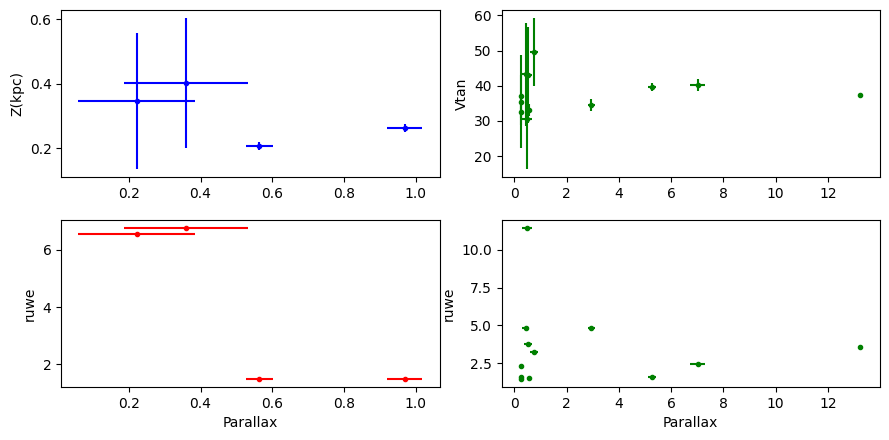

In [9]:
key=catalog["gal_z"]>0.2
key2=catalog["vtan"]>30
fig,axs=plt.subplots(2,2,figsize=(9, 4.5), tight_layout=True)
axs[0,0].errorbar(catalog["parallax"][key],catalog["gal_z"][key],xerr=catalog["parallax_error"][key],yerr=catalog["gal_z_err"][key],fmt='.', color='b')
axs[0,0].set_ylabel("Z(kpc)")
axs[1,0].set_xlabel("Parallax")

axs[1,0].errorbar(catalog["parallax"][key],catalog["ruwe"][key],xerr=catalog["parallax_error"][key],fmt='.', color='r')
plt.xlabel("Parallax")
axs[1,0].set_ylabel("ruwe")
axs[0,1].errorbar(catalog["parallax"][key2],catalog["vtan"][key2],xerr=catalog["parallax_error"][key2],yerr=catalog["vtan_err"][key2],fmt='.', color='g')
axs[0,1].set_ylabel("Vtan")
axs[1,1].errorbar(catalog["parallax"][key2],catalog["ruwe"][key2],xerr=catalog["parallax_error"][key2],fmt='.', color='g')
axs[1,1].set_ylabel("ruwe")


In [10]:
print(catalog[["main_id","parallax"]][key].sort_values("parallax"))

     main_id  parallax
3  HD 246901  0.221904
0  HD  25090  0.360045
2  HD 253122  0.564096
1  HD  42783  0.968951


In [13]:
#HD246901 is a binary with Reg giant plus B star (https://iopscience.iop.org/article/10.3847/2515-5172/ab712b)
#simbad says emission line
#HD25090 is maybe a binary system but i don't find any literature claiming it to be binary
#HD 253122 is an A tyoe star with almost neglibgible literature
#HD 42783 is a b type star with one radial velocity measurement based on hipparcos

In [14]:
print(catalog[["main_id","parallax","vtan","vtan_err"]][key2].sort_values("vtan"))

       main_id   parallax       vtan   vtan_err
26   HD  35982   0.484198  30.472815  14.295550
65   HD 247754   0.273374  32.486035   3.718167
59   HD  37318   0.566192  33.066551   1.798032
15   HD  26684   2.954327  34.522808   1.772157
67   HD 242926   0.258608  35.495742  13.332077
52   HD  35619   0.271561  36.968711   6.066910
44   HD  36756  13.241325  37.493479   0.259920
6    *  36 Lyn   5.268664  39.723395   1.174501
16   * kap Dra   7.009280  40.306158   1.701306
38  HD  34493B   0.540019  42.988802  13.581231
62   HD 244328   0.437979  43.254089  14.664593
56   HD  37367   0.761970  49.581968   9.689776


In [15]:
from astropy.wcs import WCS

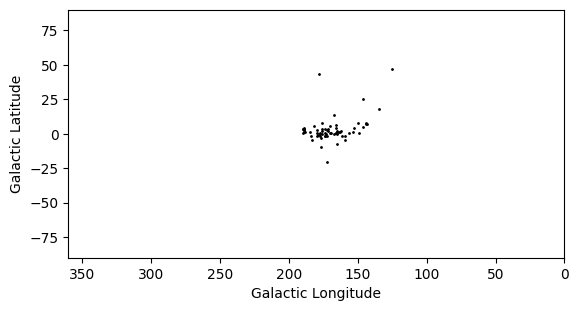

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(catalog["l"], catalog["b"], s=1, color='black', alpha=1)
ax.set_xlim(360., 0.)
ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
plt.show()

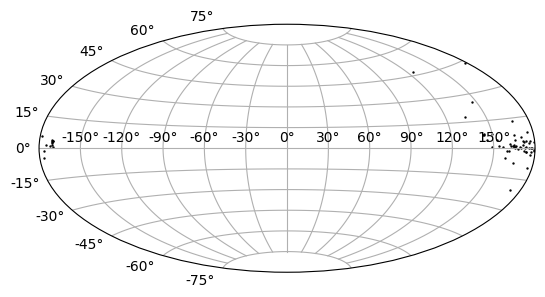

In [23]:
l_rad = np.deg2rad(catalog["l"])
l_rad[l_rad > np.pi] -= 2. * np.pi
b_rad = np.deg2rad(catalog["b"])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='aitoff')
ax.scatter(l_rad, b_rad, s=0.5, color='black', alpha=1)
ax.grid()
plt.show()

